# Utilities 


In [1]:
#Imports Libraries 

# complex networks package - guide https://networkx.org/ 
import networkx as nx

# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

import pygraphviz

import matplotlib.colors as mcolors

import scipy

from typing import Iterable
# for Notebook
%matplotlib inline

In [ ]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

# Question 1

## Ingesting the edgelist

In [ ]:
#Ingest edgelist as DiGraph

DiG = nx.read_edgelist(path = "/Users/wdaugherty/ECE 5260/ECE-5260-Graph-Based-Data-Science-for-Networked-Systems/HW6/wikispeedia.edgelist", create_using=nx.DiGraph())
DiG.is_directed()

## Identifying max hub and authority value.


In [ ]:
#Finds HITS Values

h,a = nx.hits(DiG)

#Prints the max hub key-value pair 
print(max(h.items(), key = lambda x: x[1]))

In [ ]:
#Prints the max highest authority key-value pair
print(max(a.items(), key = lambda x: x[1]))

## Pagerank

In [ ]:
#Creates a dict using the NetworkX function 
dict1 = nx.pagerank(DiG, alpha=0.1)

In [ ]:
#Plots the values of the NetworkX PageRank
plt.scatter(list(dict1.keys()), list(dict1.values()))

In [ ]:
"""
Custom PageRank


Args: 
    G: Input graph
    a: alpha parameter

Outputs:
    A dictionary with the  PageRank

"""

def PageRank(G ,a):

    N = G.number_of_nodes()
    
    transition_matrix = np.full((N,N), 1.0/N)

    for i,j in enumerate(G.nodes()):
        for k,l in enumerate(G.nodes()):
            if G.out_degree(j) > 0:
                if G.has_edge(j,l):
                    transition_matrix[i,k]= (a/N) +((1-a) / G.out_degree(j))
                else: 
                    transition_matrix[i,k]= a/N


                
    eigVal, eigVect = np.linalg.eig(transition_matrix)

    size = transition_matrix.shape[1]

    res = np.real(eigVect[:size, 0])/np.linalg.norm(eigVect[:size,0],1)

    #Returns the PageRank dictionary
    return res

In [ ]:
#Creates a dict using the custom PageRank function
dict2 = PageRank(DiG, 0.1)


In [ ]:
#Plots the values of the cutom PageRank
plt.plot(dict2)

In [ ]:
#Plots the values of the two PageRank output

plt.scatter(list(dict1.values()), dict2)

# Question 2

## Generating a connected random graph


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


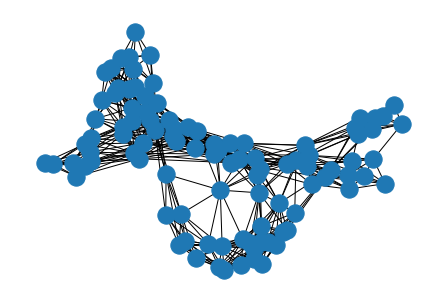

In [4]:
G = nx.random_geometric_graph(100, radius = 0.225, seed = 96845)

nx.draw(G)

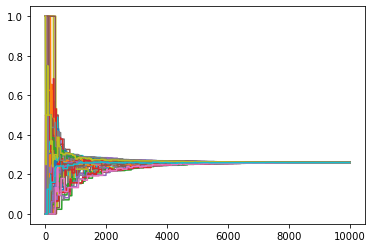

In [18]:
"""
Gossiping 

Args:

Outputs:

"""
def gossiping(N,T):
    
    x = np.zeros((N, T))
    for m in range(N):
        x[m, 0] = np.random.binomial(n=1, p= 0.2)

    for t in range(1,T):
        
        r = np.random.choice(range(len(G.edges)))
        i,j = list(G.edges)[r]

        for node in G.nodes:
            if node == i or node == j:
                x[node, t] = (x[i, t-1] + x[j, t-1])/2
            else:
                x[node, t] = x[node, t-1]
                
    for i in range(N):
        time = range(T)
        plt.plot(time, x[i, :])
    
    return (plt.show())


gossiping(100, 10000)
    